In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn
import geopandas as gpd

CURRENT_PATH = os.getcwd()
GENERAL_PATH = os.path.dirname(CURRENT_PATH)
DATA_PATH = os.path.join(GENERAL_PATH, "data")

In [98]:
act_eco_path = os.path.join(DATA_PATH, "denue_act_eco_csv\\conjunto_de_datos")

data = pd.read_csv(os.path.join(act_eco_path, "denue_inegi_46321-46531_.csv"), index_col="id",
                   encoding='latin-1', dtype={'ageb': str})
data.drop(columns=['www', 'correoelec', 'telefono'], inplace=True)
data.head()

C:\Users\Memit\AppData\Local\Temp\ipykernel_12784\3323960976.py:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(act_eco_path, "denue_inegi_46321-46531_.csv"), index_col="id",


,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,cve_mun,municipio,cve_loc,localidad,ageb,manzana,tipoUniEco,latitud,longitud,fecha_alta
id,,,,,,,,,,,,,,,,,,,,,
9287941,01001464121002241000000000U8,+ VISION,GVMV SA DE CV,464121,Comercio al por menor de lentes,0 a 5 personas,CALLE,MONTES HIMALAYA,BOULEVARD,BOULEVARD A ZACATECAS,...,1,Aguascalientes,1,Aguascalientes,0229,2,Fijo,21.923118,-102.293833,2020-11
8541319,01001464121002151000000000S9,+ VISION,GMVM SA DE CV,464121,Comercio al por menor de lentes,0 a 5 personas,AVENIDA,CONVENCION DE 1914 ORIENTE,AVENIDA,JOSE H. ESCOBEDO,...,1,Aguascalientes,1,Aguascalientes,1354,15,Fijo,21.890777,-102.274040,2019-11
8514602,01001464121001921000000000S6,+ VISION OPTICA,GVMV SA DE CV,464121,Comercio al por menor de lentes,0 a 5 personas,AVENIDA,AGUASCALIENTES SUR,PROLONGACION,PASEO DE LA ASUNCION,...,1,Aguascalientes,1,Aguascalientes,0869,42,Fijo,21.859418,-102.298205,2019-11
7043395,01010465311000081000000000U7,101 COPIAS Y PAPELERIA,NaN,465311,Comercio al por menor de artículos de papelería,0 a 5 personas,CALLE,MELCHOR OCAMPO,CALLE,BENITO JUAREZ,...,10,El Llano,1,Palo Alto ...,0143,1,Fijo,21.920380,-101.963972,2019-11
6281814,01001463211011603001007374S8,1011 TIENDAS ELECZION,GRUPO ELECZION S DE RL DE CV,463211,"Comercio al por menor de ropa, excepto de bebé...",6 a 10 personas,CALLE,5 DE MAYO,CALLE,Plaza Principal Norte,...,1,Aguascalientes,1,Aguascalientes,0638,13,Fijo,21.881665,-102.296788,2014-12


In [99]:
data[data['nombre_act'].str.contains('farmacia', case=False, na=False)]['codigo_act'].value_counts()

codigo_act
464111    53908
464112    11197
Name: count, dtype: int64

In [100]:
data = data[data.codigo_act.isin([464111, 464112])]
data.columns

Index(['clee', 'nom_estab', 'raz_social', 'codigo_act', 'nombre_act',
       'per_ocu', 'tipo_vial', 'nom_vial', 'tipo_v_e_1', 'nom_v_e_1',
       'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext',
       'letra_ext', 'edificio', 'edificio_e', 'numero_int', 'letra_int',
       'tipo_asent', 'nomb_asent', 'tipoCenCom', 'nom_CenCom', 'num_local',
       'cod_postal', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'tipoUniEco', 'latitud', 'longitud',
       'fecha_alta'],
      dtype='object')

In [101]:
print(data.cve_ent.unique())
data[['cve_ent', 'entidad']].value_counts()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]


cve_ent  entidad                        
15       México                             11565
9        Ciudad de México                    6652
14       Jalisco                             4667
30       Veracruz de Ignacio de la Llave     3659
21       Puebla                              3490
16       Michoacán de Ocampo                 3466
11       Guanajuato                          2856
7        Chiapas                             2515
13       Hidalgo                             1987
20       Oaxaca                              1966
2        Baja California                     1782
19       Nuevo León                          1612
25       Sinaloa                             1595
28       Tamaulipas                          1486
8        Chihuahua                           1404
26       Sonora                              1340
12       Guerrero                            1317
22       Querétaro                           1157
5        Coahuila de Zaragoza                1130
17       

In [102]:
conteo_por_farmacia = data['raz_social'].value_counts()

tipo_asent
COLONIA                  48033
BARRIO                    5374
FRACCIONAMIENTO           3479
LOCALIDAD                 2767
PUEBLO                    1890
MANZANA                    395
CIUDAD                     385
SECCION                    377
UNIDAD HABITACIONAL        344
EJIDO                      259
CONJUNTO HABITACIONAL      257
SUPERMANZANA               167
AMPLIACION                 143
SECTOR                     141
VILLA                      109
Name: count, dtype: int64


<Axes: xlabel='Conteo', ylabel='Tipo asentamiento'>

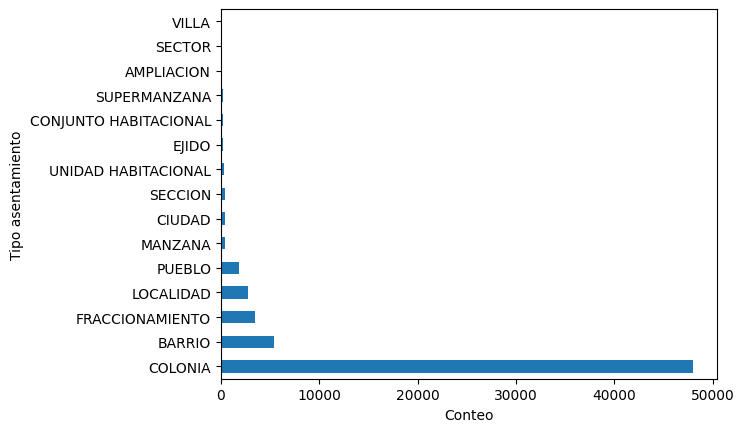

In [103]:
conteo_por_asentamiento = data.tipo_asent.value_counts()
print(conteo_por_asentamiento[:15])
conteo_por_asentamiento[:15].plot(kind='barh', xlabel="Conteo", ylabel="Tipo asentamiento")

tipoCenCom
CENTRO Y PLAZA COMERCIAL             829
MERCADO PUBLICO                      345
EDIFICIO COMERCIAL Y DE SERVICIOS    207
HOSPITAL, CENTRO MEDICO O CLINICA     81
PASAJE Y ANDADOR COMERCIAL            43
CENTRAL DE ABASTO                     39
TIANGUIS, BAZAR O PULGA               29
CENTRAL CAMIONERA                     20
PARQUE INDUSTRIAL                     14
HOTELES                                7
AEROPUERTO                             7
ZONA INDUSTRIAL                        5
CORREDOR INDUSTRIAL                    1
CIUDAD INDUSTRIAL                      1
Name: count, dtype: int64


<Axes: ylabel='tipoCenCom'>

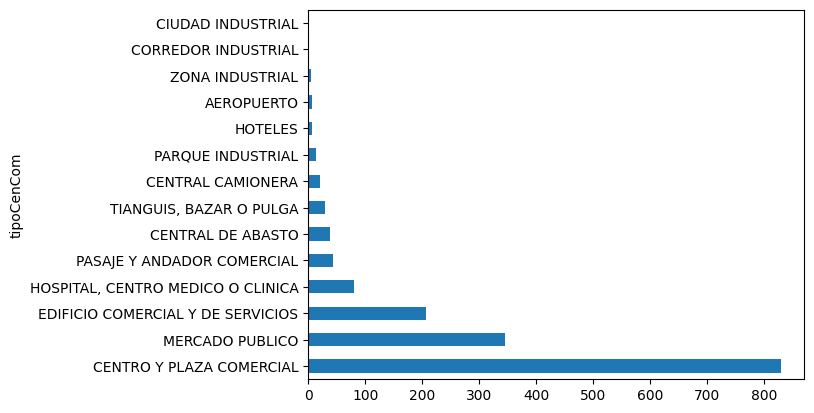

In [104]:
conteo_plaza = data.tipoCenCom.value_counts()
print(conteo_plaza)
conteo_plaza.plot(kind='barh')

<Axes: xlabel='fecha_alta'>

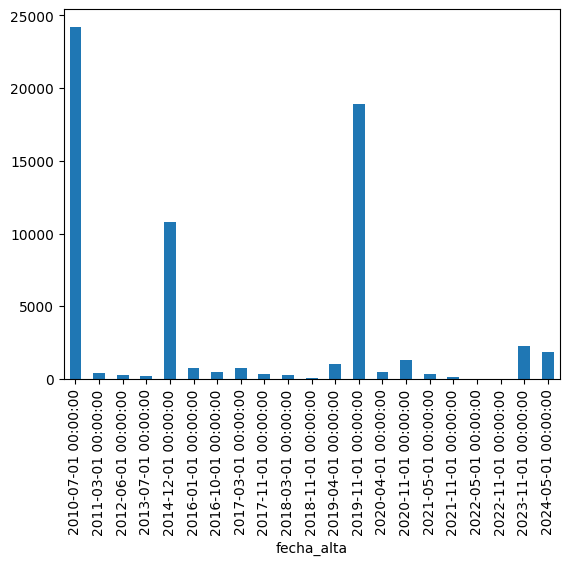

In [105]:
data.fecha_alta = data.fecha_alta.apply(lambda x: x.replace(' ', '-'))
data.fecha_alta = pd.to_datetime(data.fecha_alta, format="%Y-%m")
data.fecha_alta.sort_values().value_counts(sort=False).plot(kind='bar')

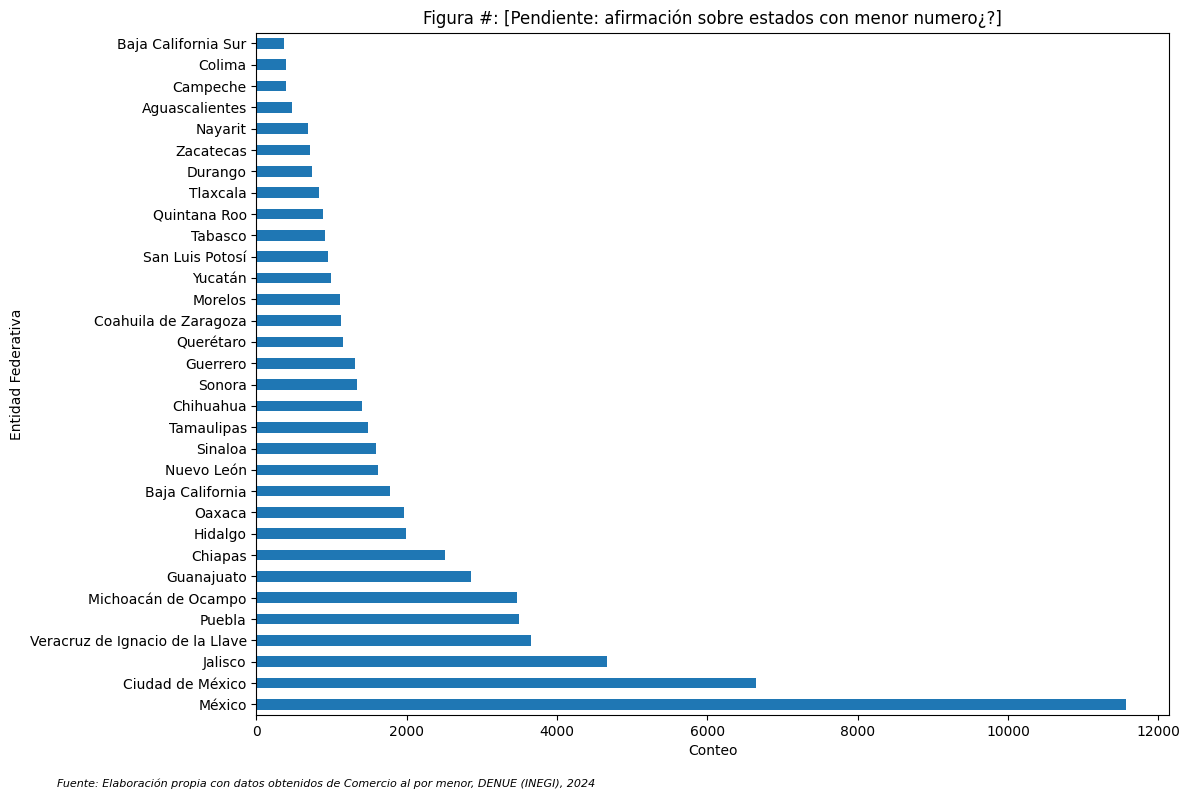

In [106]:
fig, ax = plt.subplots(figsize=(12, 8))

data.entidad.value_counts().plot(kind='barh', ax=ax, title="Figura #: [Pendiente: afirmación sobre estados con menor numero¿?]", 
                                 xlabel="Conteo", ylabel="Entidad Federativa")

plt.figtext(0.5, 0.01, "Fuente: Elaboración propia con datos obtenidos de Comercio al por menor, DENUE (INEGI), 2024", 
            ha="right", fontsize=8, style='italic')

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

In [107]:
act_eco_path_shp = os.path.join(DATA_PATH, "denue_act_eco_shp\\conjunto_de_datos")

data_shp = gpd.read_file(os.path.join(act_eco_path_shp, "denue_inegi_46321-46531_.shp"))
data_shp.set_index('id', inplace=True)
data_shp.drop(columns=['www', 'correoelec', 'telefono'], inplace=True)
data_shp.head(3)

,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,municipio,cve_loc,localidad,ageb,manzana,tipoUniEco,latitud,longitud,fecha_alta,geometry
id,,,,,,,,,,,,,,,,,,,,,
101019,02001463211005221010000000U6,EQUIS TACTICAL,None,463214,"Comercio al por menor de disfraces, vestimenta...",0 a 5 personas,AVENIDA,MEXICO,CALLE,CALIFORNIA,...,Ensenada,0001,Ensenada,7911,018,Fijo,31.852742,-116.591921,2014-12,POINT (-116.59192 31.85274)
112952,02004464111005121000000000U3,EQUILIBRIO FARMACEUTICOS,EQUILIBRIO FARMACEUTICOS,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,LA ESCONDIDA Y/O LAGUNA HANSON,CALLEJON,NINGUNO,...,Tijuana,0001,Tijuana,0579,081,Fijo,32.507295,-116.957871,2014-12,POINT (-116.95787 32.5073)
56435,02002463211005242000000000U0,ESCENA BOUTIQUE,None,463211,"Comercio al por menor de ropa, excepto de bebé...",6 a 10 personas,BOULEVARD,NINGUNO,BOULEVARD,ADOLFO LOPEZ MATEOS,...,Mexicali,0001,Mexicali,4238,035,Fijo,32.659973,-115.480589,2010-07,POINT (-115.48059 32.65997)


In [108]:
data_shp = data_shp.astype({'codigo_act' : 'int64'})
data_shp = data_shp[data_shp['codigo_act'].isin([464111, 464112])]
data_shp.columns

Index(['clee', 'nom_estab', 'raz_social', 'codigo_act', 'nombre_act',
       'per_ocu', 'tipo_vial', 'nom_vial', 'tipo_v_e_1', 'nom_v_e_1',
       'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext',
       'letra_ext', 'edificio', 'edificio_e', 'numero_int', 'letra_int',
       'tipo_asent', 'nomb_asent', 'tipoCenCom', 'nom_CenCom', 'num_local',
       'cod_postal', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'tipoUniEco', 'latitud', 'longitud',
       'fecha_alta', 'geometry'],
      dtype='object')

In [109]:
print(len(data_shp))
print(data_shp.crs)
data_shp.head(3)

65105
GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,municipio,cve_loc,localidad,ageb,manzana,tipoUniEco,latitud,longitud,fecha_alta,geometry
id,,,,,,,,,,,,,,,,,,,,,
112952,02004464111005121000000000U3,EQUILIBRIO FARMACEUTICOS,EQUILIBRIO FARMACEUTICOS,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,LA ESCONDIDA Y/O LAGUNA HANSON,CALLEJON,NINGUNO,...,Tijuana,0001,Tijuana,0579,081,Fijo,32.507295,-116.957871,2014-12,POINT (-116.95787 32.5073)
6734444,02004464111006271001000000S5,EQUILIBRIO FARMACEUTICO,EQUILIBRIO FARMACEUTICO SA DE CV,464111,Farmacias sin minisúper,6 a 10 personas,CALLE,ALAMO,CALLE,VIA RAPIDA ORIENTE,...,Tijuana,0001,Tijuana,0579,078,Fijo,32.505090,-116.954087,2016-10,POINT (-116.95409 32.50509)
72225,02002464111000321000000000U8,FARMACIA Y PAPELERÍA SAN PEDRO,None,464111,Farmacias sin minisúper,0 a 5 personas,CALZADA,LICENCIADO VICENTE LOMBARDO TOLEDANO,AVENIDA,TOLEDO,...,Mexicali,0001,Mexicali,2886,025,Fijo,32.613803,-115.472537,2010-07,POINT (-115.47254 32.6138)


<Axes: >

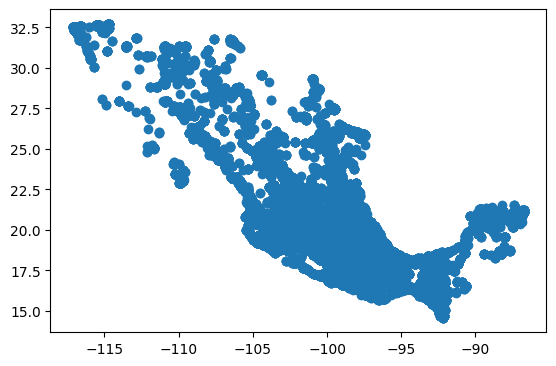

In [110]:
data_shp.plot()

In [111]:
from shapely.geometry import Point

mexico_path = os.path.join(DATA_PATH, 'Mexico')
mexico = gpd.read_file(os.path.join(mexico_path, 'mexican-states.shp'))
print(mexico.crs)

EPSG:4326


c:\Users\Memit\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\Documentos\ITAM\Dataton\dataton_env\Lib\site-packages\pyogrio\raw.py:196: RuntimeWarning: c:\Users\Memit\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\Documentos\ITAM\Dataton\Repositorio\data\Mexico\mexican-states.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


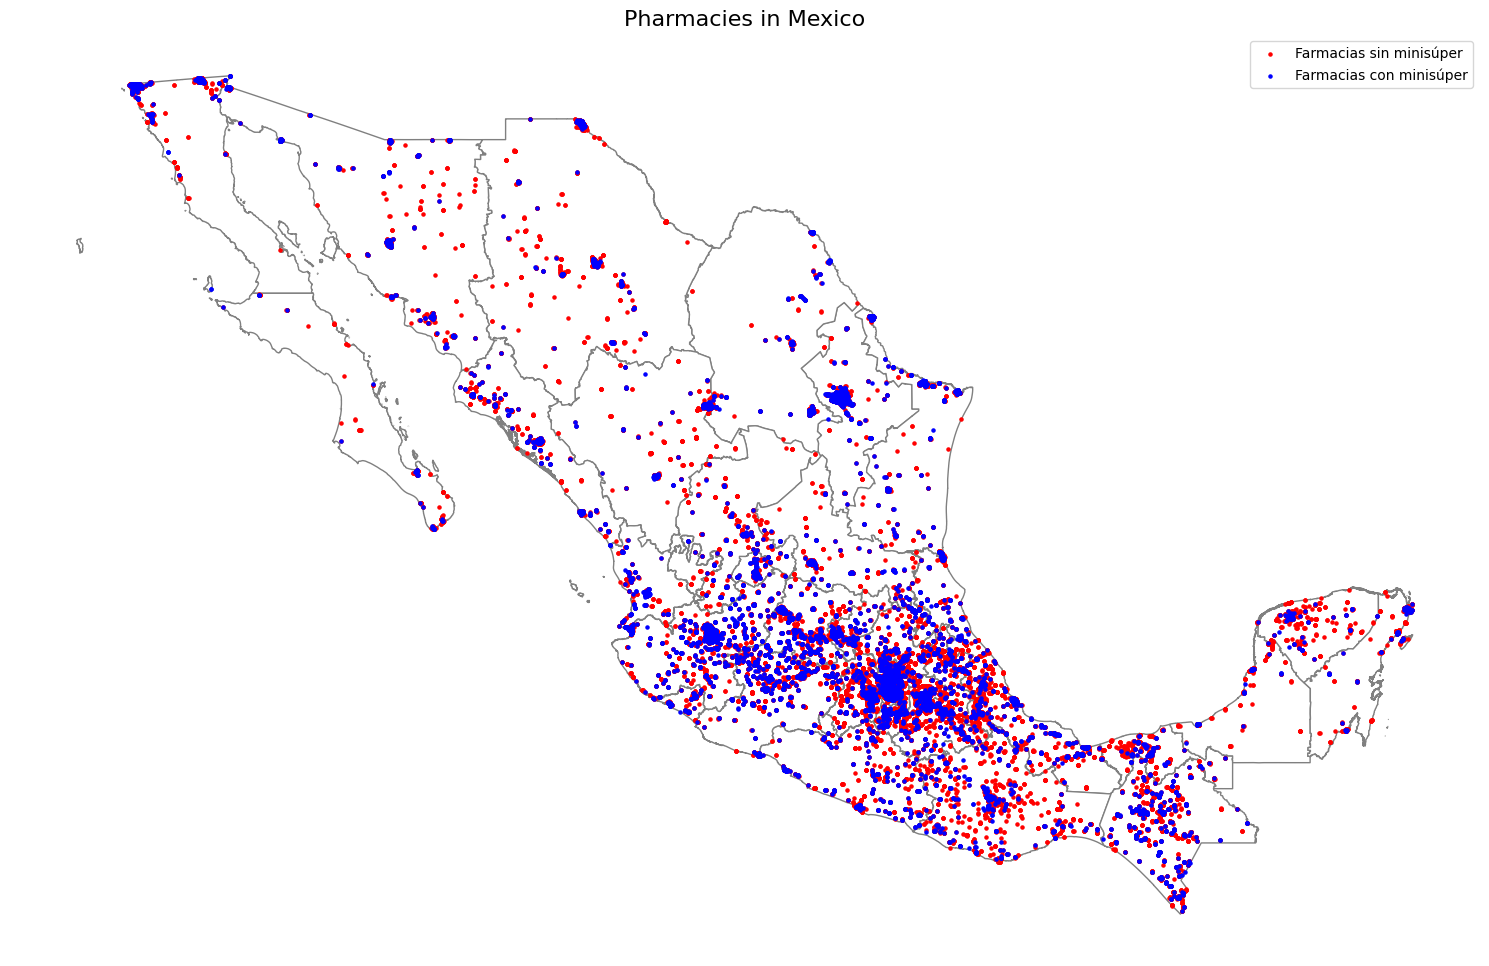

In [112]:
fig, ax = plt.subplots(figsize=(15,10))
mexico.plot(ax=ax, color = 'white', edgecolor='gray')

mini_super = data_shp['nombre_act'].unique()
colors = ['red', 'blue']  # Add more colors if you have more than two categories

for category, color in zip(mini_super, colors):
    subset = data_shp[data_shp['nombre_act'] == category]
    subset.plot(ax=ax, color=color, markersize=5, label=category)

# data_shp.plot(ax=ax, color = 'red', markersize = 5)
plt.title('Pharmacies in Mexico', fontsize=16)
ax.set_axis_off()
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
seccion_path = os.path.join(DATA_PATH, 'secciones_shp')
secciones = gpd.read_file(os.path.join(seccion_path, 'SECCION.shp'))
secciones.set_index('ID', inplace=True)
print(secciones.shape)
secciones.head(3)

(70753, 9)


,ENTIDAD,DISTRITO_F,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,GEOMETRY1_,geometry
ID,,,,,,,,,
39365,4,1,7,1,1,2,0.0,None,"POLYGON ((1199620.931 922633.121, 1199518.513 ..."
65994,24,1,2,1,1,2,0.0,None,"POLYGON ((86309.24 1154525.934, 86330.026 1154..."
2105,3,1,10,1,1,2,0.0,None,"POLYGON ((-971912.856 1477780.432, -971478.878..."


In [114]:
joined_gdf = gpd.sjoin(data_shp, secciones.to_crs(data_shp.crs), how="inner", predicate="intersects")
print(joined_gdf.shape)
joined_gdf.head(3)

(65082, 48)


,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,geometry,ID,ENTIDAD,DISTRITO_F,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,GEOMETRY1_
id,,,,,,,,,,,,,,,,,,,,,
112952,02004464111005121000000000U3,EQUILIBRIO FARMACEUTICOS,EQUILIBRIO FARMACEUTICOS,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,LA ESCONDIDA Y/O LAGUNA HANSON,CALLEJON,NINGUNO,...,POINT (-116.95787 32.5073),1093,2,5,9,4,1117,2,0.0,None
6734444,02004464111006271001000000S5,EQUILIBRIO FARMACEUTICO,EQUILIBRIO FARMACEUTICO SA DE CV,464111,Farmacias sin minisúper,6 a 10 personas,CALLE,ALAMO,CALLE,VIA RAPIDA ORIENTE,...,POINT (-116.95409 32.50509),1113,2,5,9,4,1138,2,0.0,None
72225,02002464111000321000000000U8,FARMACIA Y PAPELERÍA SAN PEDRO,None,464111,Farmacias sin minisúper,0 a 5 personas,CALZADA,LICENCIADO VICENTE LOMBARDO TOLEDANO,AVENIDA,TOLEDO,...,POINT (-115.47254 32.6138),334,2,2,3,2,342,2,0.0,None


estamos perdiendo 65105-65082=23 (hay 68 puntos que no caen en ningun poligono ¿?)

In [115]:
joined_gdf[['cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ENTIDAD', 'MUNICIPIO', 'DISTRITO_L']]

,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ENTIDAD,MUNICIPIO,DISTRITO_L
id,,,,,,,,,
112952,02,Baja California,004,Tijuana,0001,Tijuana,2,4,9
6734444,02,Baja California,004,Tijuana,0001,Tijuana,2,4,9
72225,02,Baja California,002,Mexicali,0001,Mexicali,2,2,3
6424346,02,Baja California,001,Ensenada,0124,Isla de Cedros,2,1,17
136476,02,Baja California,002,Mexicali,0001,Mexicali,2,2,2
...,...,...,...,...,...,...,...,...,...
7455217,32,Zacatecas,039,Río Grande,0001,Río Grande,32,39,17
8904199,32,Zacatecas,039,Río Grande,0001,Río Grande,32,39,17
8378158,31,Yucatán,096,Tizimín,0034,Popolnáh,31,96,17


Checar: 
- **intersects**: Returns True if the boundary or interior of the object intersect in any way with those of the other. In other words, geometric objects intersect if they have any boundary or interior point in common.
- **contains**: Returns True if no points of *other* lie in the exterior of the object and at least one point of the interior of *other* lies in the interior of object. *boundary* are therefore not contained.
- **within**: Inverse to **contains** (está contenido en). Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).
- **touches**: Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.
- **crosses**: Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.
- **overlaps**: Returns True if the geometries have more than one but not all points in common, have the same dimension, and the intersection of the interiors of the geometries has the same dimension as the geometries themselves.

In [116]:
prueba = gpd.sjoin(data_shp, secciones.to_crs(data_shp.crs), how="left", predicate="intersects")
print(len(data_shp))
print(len(prueba))
prueba[prueba.ID.isna()][['entidad', 'municipio']]

65105
65105


,entidad,municipio
id,,
7089880,Baja California Sur,Los Cabos
3617880,Quintana Roo,Solidaridad
7877026,Quintana Roo,Solidaridad
3619895,Quintana Roo,Solidaridad
3664623,Quintana Roo,Benito Juárez
8915305,Quintana Roo,Solidaridad
7878990,Quintana Roo,Solidaridad
8720642,Quintana Roo,Solidaridad
6762675,Quintana Roo,Solidaridad


In [117]:
index_og = set(data_shp.index)
index_res = set(joined_gdf.index)
diff = index_og - index_res
data_shp.loc[list(diff)]['raz_social'].value_counts(dropna = False)

raz_social
None                              17
DROUGSTORE XPRESS SA DE CV         1
PHARMA PLAYA DRUSTORE SA DE CV     1
DRUGSTORE XPRESS SA DE CV          1
PHARMA PLAYA SA DE CV              1
GFLOFEX SAPI DE CV                 1
ROXANAS DEL CARIBE SA DE CV        1
Name: count, dtype: int64

In [118]:
joined_gdf.SECCION.value_counts()

SECCION
868     87
316     79
1192    74
459     74
2       72
        ..
6306     1
4971     1
4969     1
4098     1
4064     1
Name: count, Length: 5949, dtype: int64

In [119]:
unmatched_points = data_shp.loc[list(diff)]

nearby_join = gpd.sjoin_nearest(unmatched_points, secciones.to_crs(data_shp.crs), how="inner", max_distance=1,
                                distance_col='distance')
print(len(data_shp.loc[list(diff)]))
print(len(nearby_join))
print(nearby_join['distance'].mean())
nearby_join.drop(columns={'distance'}, inplace=True)
nearby_join[['cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ENTIDAD', 'MUNICIPIO', 'DISTRITO_L', 'SECCION']]

c:\Users\Memit\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\Documentos\ITAM\Dataton\dataton_env\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


23
23
0.0005292201458451082


,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ENTIDAD,MUNICIPIO,DISTRITO_L,SECCION
id,,,,,,,,,,
8720642,23,Quintana Roo,008,Solidaridad,0001,Playa del Carmen,23,8,10,922
3884953,26,Sonora,048,Puerto Peñasco,0001,Puerto Peñasco,26,53,2,647
7906721,23,Quintana Roo,008,Solidaridad,0001,Playa del Carmen,23,8,11,763
7877026,23,Quintana Roo,008,Solidaridad,0001,Playa del Carmen,23,8,10,206
3884967,26,Sonora,048,Puerto Peñasco,0001,Puerto Peñasco,26,53,2,647
7909674,26,Sonora,048,Puerto Peñasco,0001,Puerto Peñasco,26,53,2,647
8263855,26,Sonora,048,Puerto Peñasco,0001,Puerto Peñasco,26,53,2,647
7833519,23,Quintana Roo,008,Solidaridad,0001,Playa del Carmen,23,8,10,206
8263858,26,Sonora,048,Puerto Peñasco,0001,Puerto Peñasco,26,53,2,647


In [120]:
nearby_join

,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,geometry,ID,ENTIDAD,DISTRITO_F,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,GEOMETRY1_
id,,,,,,,,,,,,,,,,,,,,,
8720642,23008464111001331000000000S8,DRUGS & DELI,DROUGSTORE XPRESS SA DE CV,464111,Farmacias sin minisúper,0 a 5 personas,AVENIDA,5 (NORTE),CALLE,16 NORTE BIS,...,POINT (-87.07053 20.628),65708,23,1,10,8,922,2,0.0,None
3884953,26048464112000101000000000U7,FARMACIA PICK AND SAVE,None,464112,Farmacias con minisúper,0 a 5 personas,CALLE,CIRCUNVALACION (MALECON KINO),CALLE,ULLOA,...,POINT (-113.55192 31.30323),28197,26,1,2,53,647,2,0.0,None
7906721,23008464111001161000000000U9,PHARMACOS,None,464111,Farmacias sin minisúper,0 a 5 personas,PRIVADA,NINGUNO,AVENIDA,SIN REFERENCIA,...,POINT (-87.07519 20.62105),65625,23,1,11,8,763,2,0.0,None
7877026,23008464111001291000000000S4,FARMACIA DE LA RIVIERA DROGSTORE,None,464111,Farmacias sin minisúper,0 a 5 personas,AVENIDA,1 NORTE,CALLE,16 NORTE BIS,...,POINT (-87.07077 20.62765),65075,23,1,10,8,206,2,0.0,None
3884967,26048464111000221000000000U5,FARMACIA CORAL,None,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,ULLOA,CALLE,CIRCUNVALACION (MALECON KINO),...,POINT (-113.55187 31.30409),28197,26,1,2,53,647,2,0.0,None
7909674,26048464112000371000000000U6,FARMACIA MEDI MART,None,464112,Farmacias con minisúper,0 a 5 personas,CALLE,CIRCUNVALACION (MALECON KINO),CALLE,ULLOA,...,POINT (-113.55216 31.30451),28197,26,1,2,53,647,2,0.0,None
8263855,26048464111000421000000000U1,FARMACIA AYLIN,None,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,CIRCUNVALACION (MALECON KINO),CALLE,ULLOA,...,POINT (-113.55214 31.30419),28197,26,1,2,53,647,2,0.0,None
7833519,23008464111001241000000000U9,PHARMA PLAYA DRUSTORE,PHARMA PLAYA DRUSTORE SA DE CV,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,4 NORTE,None,NINGUNO,...,POINT (-87.07374 20.624),65075,23,1,10,8,206,2,0.0,None
8263858,26048464111000431000000000U0,FARMACIA ADN,None,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,ULLOA,CALLE,CIRCUNVALACION (MALECON KINO),...,POINT (-113.55199 31.30407),28197,26,1,2,53,647,2,0.0,None


In [121]:
joined_gdf_complete = pd.concat([joined_gdf, nearby_join], axis=0)

In [129]:
joined_gdf_complete.SECCION.value_counts()

SECCION
868     87
316     80
459     74
1192    74
2       72
        ..
6306     1
4971     1
4969     1
4098     1
4064     1
Name: count, Length: 5949, dtype: int64